# Статистика, DS-поток
## Задание S.9

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

* Задача 1 &mdash; 70 баллов;
* Задача 2 &mdash; 50 баллов;
* Задача 3 &mdash; 50 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 30 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи 1-4;
* *средняя:* задача 5;

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [134]:
# Bot check

# HW_ID: ds_sp9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [135]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
import warnings
warnings.filterwarnings("ignore")

_____
### Задача 1.



Вспомним задачу из предыдущего практического задания. Напомним формулировку.

Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события.
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

Укажите равномерно наиболее мощный критерий и определите для него p-value.

$S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, и $c_{\alpha}$ = sps.binom.ppf(1-$\alpha$, n=n, p=0.5)  
Тогда p-value = 1 − sps.binom.cdf(t-1, n=n, p=0.5), где t - реализация T (вычитаем единицу, чтобы учесть строгость знака)

Проведите несколько экспериментов аналогично предыдущему заданию, дополнив таблицу значениями p-value.

*Замечание:* Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [136]:
n = np.arange(1, 1000+2)
sample = sps.bernoulli.rvs(p=1/2, size=len(n))
table = pd.DataFrame({'n':n, 'T(X)':np.cumsum(sample), 'c_a':sps.binom.ppf(1-0.05, n=n, p=0.5)})
table['Итог'] = (table['T(X)'] >= table['c_a']).astype(int)  # проверка критерия S
table['p-value'] = table.apply(lambda row: 1-sps.binom.cdf(row['T(X)']-1, n=row['n'], p=0.5), axis=1).round(3)
table[table.n.isin([10,50,100,500,1000])]

,n,T(X),c_a,Итог,p-value
9,10,4,8.0,0,0.828
49,50,24,31.0,0,0.664
99,100,50,58.0,0,0.540
499,500,251,268.0,0,0.482
999,1000,523,526.0,0,0.077


Представьте себя заказчиком. Каким должно быть истинное значение $p$, чтобы с точки зрения практики можно было бы считать, что связь между черным котом и неудачей имеется?

*Ответ зависит от практических и финансовых соображений.*  
*В случае конкретно с "черным котом" значение p не важно, потому что связи между черным котом и неудачей физически не может быть. Любая обнаруженная взаимосвязь скорее говорит о неправильно поставленном эксперименте.*  
*В рамках текущей задачи (SP8.1\SP9.1) заказчик принимает решение о выкатке модели в продакшн. Поэтому нужно посчитать, сколько денег новая модель принесет (в зависимости от p), и сколько денег будет потрачено на ее выкатку. Искомое значение p - такое, при котором прибыль покроет издержки. Пусть финансовый отдел всё посчитал и было принято p=0.6*

Традиционный вопрос заказчика &mdash; сколько необходимо провести экспериментов? Заказчик не хочет долго ждать, но хочет, чтобы у вашего критерия была достаточная мощность.

Для начала сгенерируйте 10 выборок для двух случаев:
1. $n=5, p=0.75$;
2. $n=10^5, p=0.51$.

В каждом случае в виде таблицы выведите
* реализацию статистики $T(X)$,
* соответствующее p-value,
* 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [137]:
for n, p in zip([5,100_000], [0.75,0.51]):
    print(f'n={n}, p={p}')
    sample = sps.bernoulli.rvs(p=p, size=(n,10))
    table = pd.DataFrame({'T(X)':np.sum(sample, axis=0)})
    table['p-value'] = table['T(X)'].apply(lambda t: 1-sps.binom.cdf(t-1, n=n, p=p)).round(3)
    table['Итог'] = (table['T(X)'] >= sps.binom.ppf(1-0.05, n=n, p=p)).astype(int)
    display(table)

n=5, p=0.75


,T(X),p-value,Итог
0,5,0.237,1
1,2,0.984,0
2,3,0.896,0
3,4,0.633,0
4,4,0.633,0
5,3,0.896,0
6,5,0.237,1
7,4,0.633,0
8,3,0.896,0
9,5,0.237,1


n=100000, p=0.51


,T(X),p-value,Итог
0,51064,0.344,0
1,50986,0.537,0
2,51146,0.179,0
3,50781,0.918,0
4,51077,0.314,0
5,50852,0.826,0
6,50908,0.721,0
7,51070,0.330,0
8,50832,0.857,0
9,51228,0.075,0


***Вывод:** оптимальное кол-во экспериментом зависит от ряда факторов: уровня значимости, желаемого значения мощности и размера детектируемого эффекта*

Теперь разберемся с тем, как подобрать оптимальный размер выборки.

1. Зафиксируйте значение $p^* > 1/2$, которое на практике обычно называется *минимальным детектируемым эффектом*. Оно должно обладать следующими свойствами.
    - Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть новая модель действительно работает лучше.
    - В противном случае отклонение с практической точки зрения признается несущественным.
2. Для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
3. Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

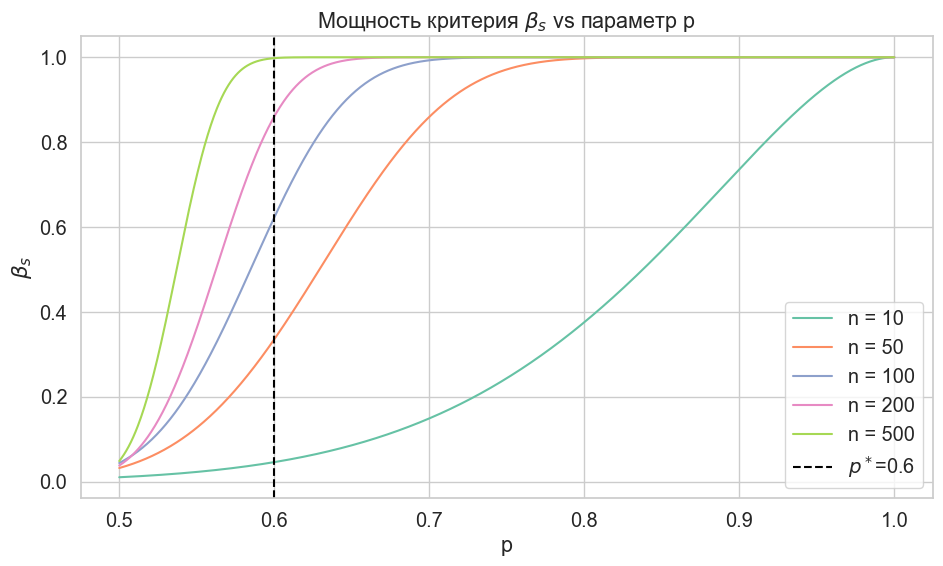

In [138]:
p_star = 0.6

n = np.arange(1, 1000+2)
sample = sps.bernoulli.rvs(p=1/2, size=len(n))
table = pd.DataFrame({'n':n, 'T(X)':np.cumsum(sample), 'c_a':sps.binom.ppf(1-0.05, n=n, p=0.5)})
p = np.linspace(1/2, 1, 1000)
plt.figure(figsize=(11,6))
for n in [10,50,100,200,500]:
    b_s = sps.binom.sf(table[table.n==n]['c_a'], n=n, p=p)
    plt.plot(p, b_s, label=f'n = {n}')
plt.axvline(p_star, color='black', linestyle='--', label=f'$p^*$={p_star}')
plt.legend()
plt.title('Мощность критерия $\\beta_s$ vs параметр p')
plt.xlabel('p')
plt.ylabel('$\\beta_s$')
plt.show()

*По графику видно, что минимальное n (из рассмотренных), для которого мощность выше 0.8, это $n^*=200$*

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$:
 1. $1/2 < p < p^*$;
 2. $p > p^*$.

In [139]:
n_star = 200
for p in [0.51,0.75]:
    print(f'n*={n_star}, p={p} (p*=0.6)')
    sample = sps.bernoulli.rvs(p=p, size=(n_star,10))
    table = pd.DataFrame({'T(X)':np.sum(sample, axis=0)})
    table['p-value'] = table['T(X)'].apply(lambda t: 1-sps.binom.cdf(t-1, n=n_star, p=p)).round(3)
    table['Итог'] = (table['T(X)'] >= sps.binom.ppf(1-0.05, n=n_star, p=p)).astype(int)
    display(table)

n*=200, p=0.51 (p*=0.6)


,T(X),p-value,Итог
0,109,0.179,0
1,98,0.738,0
2,99,0.690,0
3,104,0.416,0
4,92,0.931,0
5,100,0.638,0
6,105,0.362,0
7,102,0.528,0
8,88,0.980,0
9,98,0.738,0


n*=200, p=0.75 (p*=0.6)


,T(X),p-value,Итог
0,148,0.663,0
1,152,0.408,0
2,138,0.977,0
3,148,0.663,0
4,157,0.144,0
5,161,0.041,1
6,152,0.408,0
7,157,0.144,0
8,160,0.058,1
9,146,0.771,0


***Вывод:** в этой задаче удалось пронаблюдать, насколько сильно исход статистического исследования зависит от практических соображений. Важно правильно просчитать затраты и возможную прибыль, оценить минимальный детектируемый эффект, ограничить снизу мощность. В целом, важно скептически относиться к р-value, потому что оно не существует в вакууме: нужно детально изучить постановку и особенности задачи перед тем, как делать какие-либо выводы*

_____
### Задача 2.

Рассмотрим выборку $X = (X_{1}, ..., X_{n}) \sim \mathcal{N}(\theta, 1)$. Проверяются гипотезы $\mathsf{H}_0\colon\ \theta = 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Выпишите равномерно наиболее мощный критерий, который получен в предыдущем домашнем задании.

*Критерий:* $S = \left\{\overline{X} \cdot \sqrt{n} \geq z_{\alpha} \right\}$

На практике если предполагается, что распределение статистики критерия $T(X)$ одинаково и непрерывно, то перед применением критерия можно проверить его на корректность следующим образом.
1. Генерируется множество искусственных выборок в предположении справедливости $\mathsf{H}_0$.
2. По каждой из выборок вычисляется p-value.
3. По всем p-value строится гистограмма, которая визуально проверяется на равномерность.

В AB-тестировании такая процедура часто носит название *AA-тестирование*.

Проверим корректность нашего критерия. Конечно, у нас случай довольно простой, тут и так "все понятно", но стоит отработать навык проверки.
Проведите эксперимент на $10^6$ выборок размера 100 и постройте гистограмму.

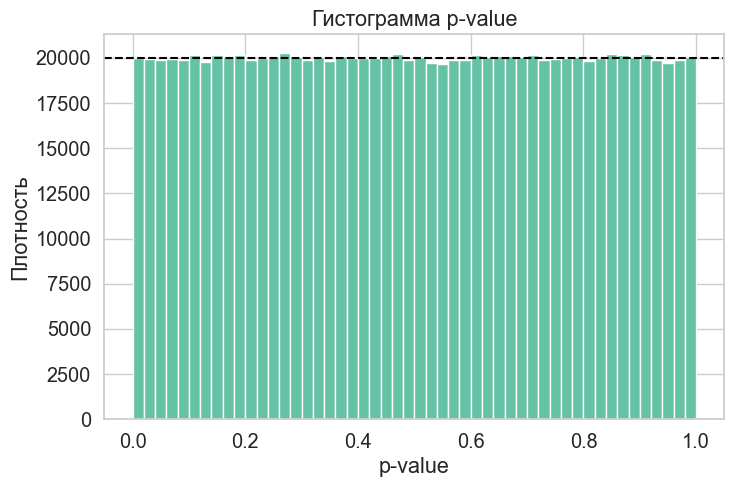

In [140]:
def xp(theta=0, sample_size=100, sample_count=10**6):  # параметр сдвига, размер выборки, кол-во выборок
    samples = sps.norm(loc=theta, scale=1).rvs(size=(sample_size, sample_count))  # множество выборок
    Z_stats = samples.mean(axis=0)*np.sqrt(sample_size)  # статистика для каждой из выборок
    pvalues = 1 - sps.norm.cdf(Z_stats)  # p-value для каждой из выборок
    plt.figure(figsize=(8, 5))
    plt.hist(pvalues, bins=50)
    plt.title('Гистограмма p-value')
    plt.xlabel('p-value')
    plt.ylabel('Плотность')
    plt.axhline(sample_count/50, color='black', linestyle='--')  # для наглядности плотность равномерного
    plt.show()

xp(theta=0, sample_size=100, sample_count=10**6)

*Действительно, распределение похоже на равномерное*

Как известно, критерий не меняется при рассмотрении сложной основной гипотезы $\mathsf{H}_0\colon\ \theta \leqslant 0\ \ vs.\ \ \mathsf{H}_1\colon\ \theta\ > 0$.

Повторите эксперимент для истинного $\theta=-0.1$.

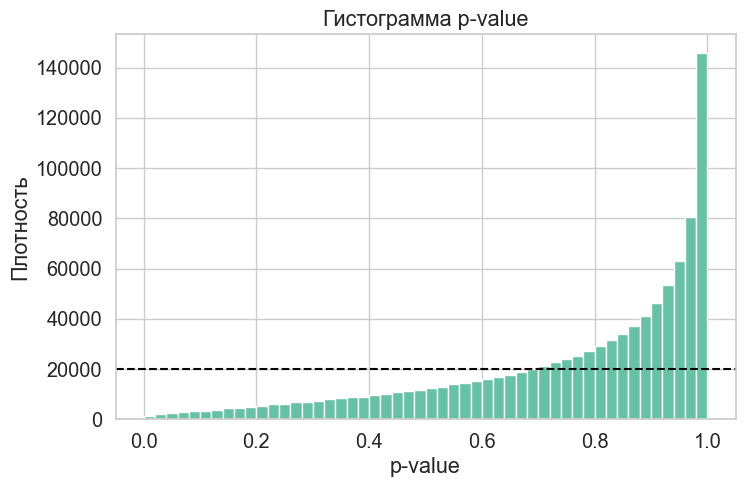

In [141]:
xp(theta=-0.1, sample_size=100, sample_count=10**6)

*А теперь распределение не похоже на равномерное*

*Замечание.* Подобный эффект все равно не дает оснований говорить об уверенности $\mathsf{H}_0$, поскольку критерий может быть недостаточно мощным.

Проверьте, как ведет себя p-value для альтернативы, рассмотрев истинную $\theta=0.1$.

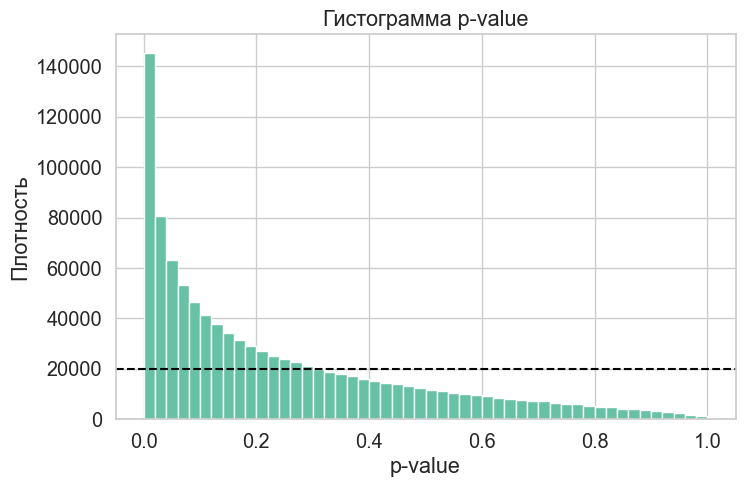

In [142]:
xp(theta=0.1, sample_size=100, sample_count=10**6)

Чему соответствует доля случаев, в которых p-value меньше 0.05?

*Уровню значимости гипотезы, т.е. ошибке первого рода. Иными словами, при маленьких p-value мы можем отвергнуть гипотезу с высокой уверенностью*

***Вывод:** в задаче удалось изучить свойства распределения p-value и провести "AA-тестирование", т.е. проверку корректности критерия*

__________________
### Задача 3.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

Cуществует модификация критерия Колмогорова для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На семинарах разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100.

*Подсказка:*

In [143]:
# max_sample_size = ...
# sample_count = ...
# is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# for i in tqdm(range(max_sample_size)):
#     for j in range(sample_count):
#         sample = ...
#         is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [144]:
max_sample_size, sample_count, alpha = 100, 1000, 0.05
criteria = {'Лиллиефорса':sm.stats.diagnostic.lilliefors, 'Жарка-Бера':sps.normaltest, 'Шапиро-Уилка':sps.shapiro}
is_reject = {name:np.zeros((max_sample_size, sample_count), dtype=bool) for name in criteria}

# ValueError: skewtest is not valid with less than 8 samples; 5 samples were given. Так что я начал цикл с 8
for i in tqdm(range(8, max_sample_size+1)):
    for j in range(sample_count):
        sample = sps.norm(loc=0, scale=1).rvs(size=i)
        for name, crit in criteria.items():
            is_reject[name][i-1, j] = (crit(sample)[1] < alpha)  # pvalue < alpha
true_sign = {name:np.mean(is_reject[name], axis=1) for name in criteria}  # реальный ур. знач.

  0%|          | 0/93 [00:00<?, ?it/s]

Поясните, почему вы выбрали такое значение `sample_count`.

*Значение sample_count должно быть достаточно большим (т.к. критерии асимптотические), но при этом - практически реализуемым. Например, миллион экспериментов поставить не получилось бы по времени*

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

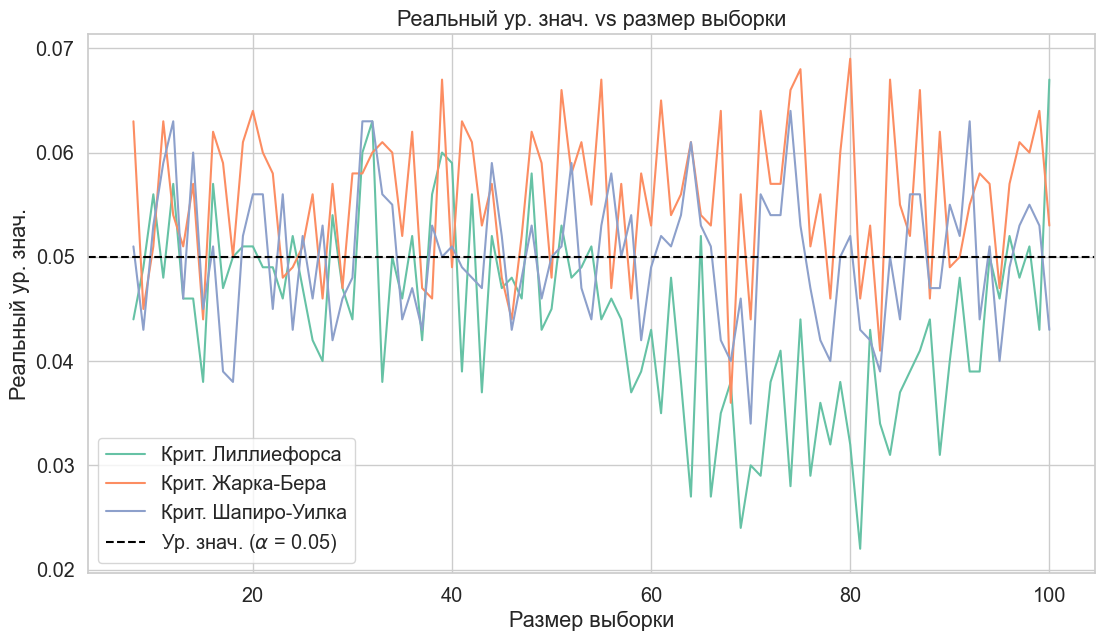

In [145]:
plt.figure(figsize=(13,7))
for name in criteria:
    plt.plot(range(8, max_sample_size+1), true_sign[name][7:], label=f'Крит. {name}')
plt.axhline(y=alpha, color='black', linestyle='--', label='Ур. знач. ($\\alpha$ = 0.05)')
plt.title('Реальный ур. знач. vs размер выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Реальный ур. знач.')
plt.legend()
plt.show()

Какой можно сделать вывод?

*С асимптотическими критериями надо быть осторожным. Реальное значение уровня значимости может сильно отличаться от желаемого (хоть и стремится к нему с ростом размера выборки)*

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


  0%|          | 0/93 [00:00<?, ?it/s]

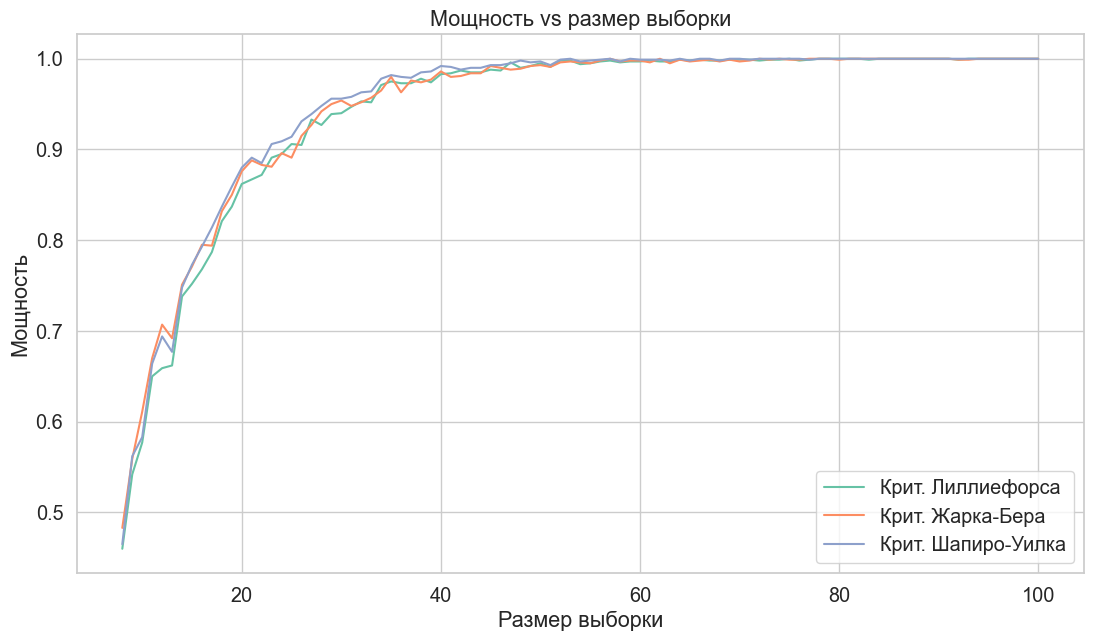

In [146]:
count_reject = {name:np.zeros(max_sample_size, dtype=int) for name in criteria}

# ValueError: skewtest is not valid with less than 8 samples; 5 samples were given. Так что я начал цикл с 8
for i in tqdm(range(8, max_sample_size+1)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size=i)
        for name, crit in criteria.items():
            count_reject[name][i-1] += (crit(sample)[1] < alpha)  # +1 if pvalue < alpha
power = {name:count_reject[name]/sample_count for name in criteria}  # мощность

plt.figure(figsize=(13,7))
for name in criteria:
    plt.plot(range(8, max_sample_size+1), power[name][7:], label=f'Крит. {name}')
plt.title('Мощность vs размер выборки')
plt.xlabel('Размер выборки')
plt.ylabel('Мощность')
plt.legend()
plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

*Наиболее мощным получился критерий Шапиро-Уилка. Логично, что мощность растет с увеличением выборки*

**3.** Распределение Стьюдента является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы).
Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно посчитать функцию. Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от количества степеней свободы для каждого критерия. Не забудьте добавить легенду и подписать оси.

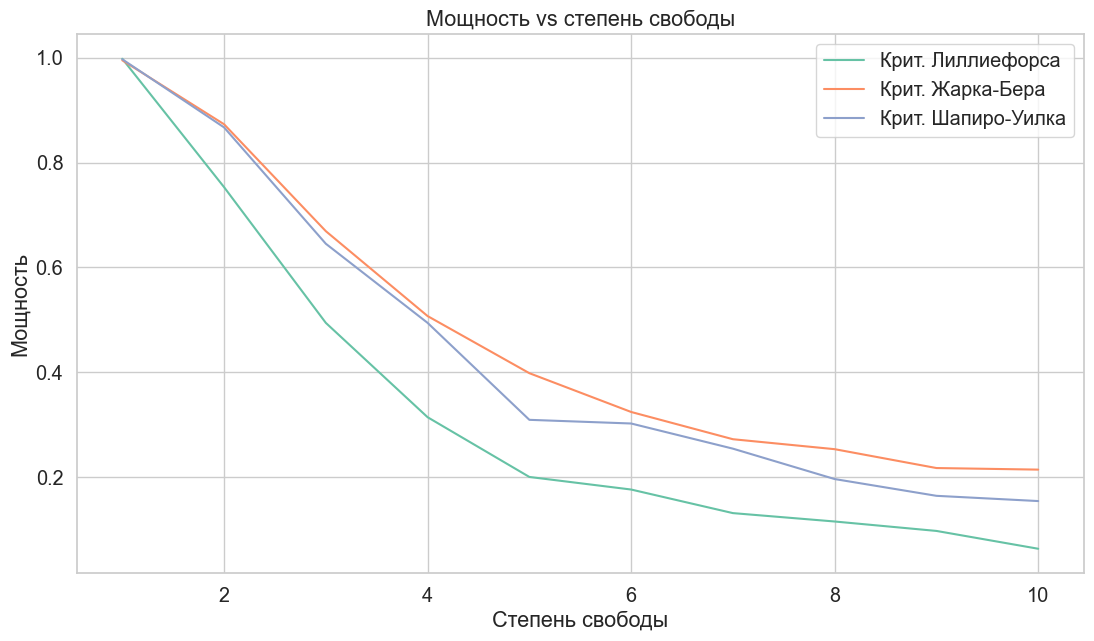

In [147]:
power = {name:[] for name in criteria}  # мощность
for deg in range(1, 11):
    for name, crit in criteria.items():
        count_reject = 0
        for j in range(sample_count):
            sample = sps.t(deg).rvs(size=50)
            count_reject += (crit(sample)[1] < alpha)  # +1 if pvalue < alpha
        power[name].append(count_reject / sample_count)

plt.figure(figsize=(13,7))
for name in criteria:
    plt.plot(range(1,11), power[name], label=f'Крит. {name}')
plt.title('Мощность vs степень свободы')
plt.xlabel('Степень свободы')
plt.ylabel('Мощность')
plt.legend()
plt.show()

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы.

*Мощность критерия снижается при увеличении числа степеней свободы*

___
### Задача 4.

Студенты периодически отправляют запросы в бот. Иногда бот бывает недоступен, поэтому студенты с некоторыми интервалами повторяют запросы до тех пор, пока бот не ответит. Известно, что $52$ запроса дошли с первой попытки, $31$ &mdash; со второй, $3$ &mdash; с третьей, а для доставки еще $5$ запросов потребовалось более $4$ попыток. Верно ли, что бот получает запросы с вероятностью $\frac{2}{3}$?

**Решение:**

*Пусть $N = 52+31+3+5 = 91$ - общее число запросов, $p$ - вероятность успешного получения запроса. Тогда:*  
$52 = Np$  
$31 = N(1-p)p$  
$3 = N(1-p)^2p$   
$5 = N(1-p)^3$  
*$H_0: p=\frac{2}{3}$. Проверим критерий хи-квадрат: $\{\widehat{\chi} \geq \chi^2_{4-1,1-\alpha}\}$*

In [148]:
p = 2/3
chi_hat = ((52-91*p)**2)/(91*p) + ((31-91*(1-p)*p)**2)/(91*(1-p)*p) + ((3-91*p*(1-p)**2)**2)/(91*p*(1-p)**2) + ((5-91*(1-p)**3)**2)/(91*(1-p)**3)
chi2 = sps.chi2(4-1).ppf(1-0.05)
print(f'{chi_hat:.2f} {">=" if chi_hat>=chi2 else "<"} {chi2:.2f}')

9.85 >= 7.81


***Вывод:** критерий выполняется, отвергаем нулевую гипотезу. То есть с высокой уверенностью можно сказать, что вероятность НЕ равна $\frac{2}{3}$*

____
### Задача 5.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины.

**1.** Реализуйте критерий для генерации выборки $U\{1, ..., 10\}$, аналогично разобранному на семинаре. Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения.

*$H_0$: распределение равномерное*

In [149]:
n = 1000
sample = sps.randint.rvs(1, 11, size=n)
_, pvalue = sps.chisquare(
    f_obs=[np.sum(sample==i) for i in range(1,11)],  # наблюдаемые частоты
    f_exp=[n/10]*10  # ожидаемые (теоретические) частоты
)
print(f'{pvalue:.2f} {">=" if pvalue>=0.05 else "<"} 0.05')

0.85 >= 0.05


*Не можем отвергнуть $H_0$, т.е. распределение может быть равномерным*

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5.

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления плотности воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.

**Решение:**

In [150]:
<...>

SyntaxError: invalid syntax (3000440494.py, line 1)

**Вывод:**

<...>